<a href="https://colab.research.google.com/github/ixomaxip/nasoc/blob/master/src/test_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [67]:
seed = 42

You can skip options one and two and go to the third one.

# Open the dataset from your local PC or GDrive

In [ ]:
# option (1) - load a file from your local PC
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# the file content is here:
rows = uploaded["en_Hasoc2021_train.csv"]

Saving en_Hasoc2021_train.csv to en_Hasoc2021_train (2).csv
User uploaded file "en_Hasoc2021_train.csv" with length 807293 bytes


In [ ]:
import io
#lines = rows.decode("utf-8")
pd.read_csv(io.BytesIO(rows)) #io.StringIO(lines))

,Unnamed: 0,_id,text,task_1,task_2
0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN
1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN
2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE
3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN
4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN
...,...,...,...,...,...
3838,1661,60c5d6bf5659ea5e55defd57,@BBCNews Let the dog deal with the wanker once...,HOF,PRFN
3839,194,60c5d6bf5659ea5e55def185,India has suffered a lot. That Chinese bastard...,HOF,HATE
3840,3988,60c5d6bf5659ea5e55def78c,People didn't give 300+ seats majority to BJP ...,HOF,HATE
3841,4212,60c5d6bf5659ea5e55defb04,"@KanganaTeam This is such a vile, xenophobic a...",HOF,PRFN


In [ ]:
#option (2) - load a file from GDrive
from google.colab import drive
drive.mount('/content/drive')

path_gdrive = '/content/drive/My Drive/nasoc/en_Hasoc2021_train.csv'
#with open(path_gdrive, 'r') as f:
#  print(f.read())

pd.read_csv(path_gdrive)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,_id,text,task_1,task_2
0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN
1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN
2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE
3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN
4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN
...,...,...,...,...,...
3838,1661,60c5d6bf5659ea5e55defd57,@BBCNews Let the dog deal with the wanker once...,HOF,PRFN
3839,194,60c5d6bf5659ea5e55def185,India has suffered a lot. That Chinese bastard...,HOF,HATE
3840,3988,60c5d6bf5659ea5e55def78c,People didn't give 300+ seats majority to BJP ...,HOF,HATE
3841,4212,60c5d6bf5659ea5e55defb04,"@KanganaTeam This is such a vile, xenophobic a...",HOF,PRFN


# Download and unzip

## Download file

In [1]:
#option (3) - download it, since we are brave enough to store the password here :)
!wget https://hasocfire.github.io/hasoc/2021/files/en_Hasoc2021_train.zip
!unzip -P hasoc2021_en en_Hasoc2021_train.zip
!ls

--2021-08-03 20:51:57--  https://hasocfire.github.io/hasoc/2021/files/en_Hasoc2021_train.zip
Resolving hasocfire.github.io (hasocfire.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to hasocfire.github.io (hasocfire.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330206 (322K) [application/zip]
Saving to: ‘en_Hasoc2021_train.zip’

en_Hasoc2021_train. 100%[===================>] 322.47K  --.-KB/s    in 0.03s   

2021-08-03 20:51:57 (9.65 MB/s) - ‘en_Hasoc2021_train.zip’ saved [330206/330206]

Archive:  en_Hasoc2021_train.zip
  inflating: en_Hasoc2021_train.csv  
en_Hasoc2021_train.csv	en_Hasoc2021_train.zip	sample_data


## EDA (sort of)

In [11]:
raw_dataset = pd.read_csv('en_Hasoc2021_train.csv')
ds_head = raw_dataset.head()

ds_head

,Unnamed: 0,_id,text,task_1,task_2
0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN
1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN
2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE
3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN
4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN


In [35]:
print(list(raw_dataset.columns.values.tolist()))

['Unnamed: 0', '_id', 'text', 'task_1', 'task_2']


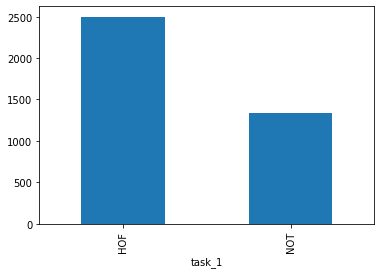

In [48]:
raw_dataset.groupby('task_1').count()['text'].plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f472b946fd0>,
      dtype=object)

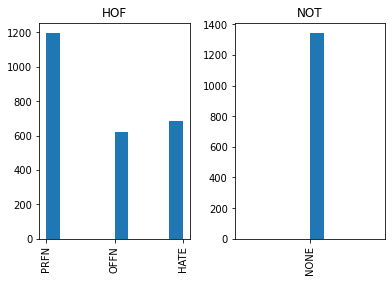

In [46]:
raw_dataset.hist(by='task_1', column='task_2')

## Data split

In [104]:
raw_dataset['task_1_cat'] = pd.Categorical(raw_dataset['task_1'])
raw_dataset['task_1_cat'] = raw_dataset.task_1_cat.cat.codes

raw_dataset['task_2_cat'] = pd.Categorical(raw_dataset['task_2'])
raw_dataset['task_2_cat'] = raw_dataset.task_2_cat.cat.codes

print(list(raw_dataset.columns.values.tolist()))
print(raw_dataset.head())

train_df, test_df = train_test_split(raw_dataset, test_size=0.2, random_state=seed)

sr_train = train_df.groupby('task_1').count()['text']
sr_test  = test_df.groupby('task_1').count()['text']

tr_pr = sr_train['NOT']/sr_train['HOF']
ts_pr = sr_test['NOT']/sr_test['HOF']

print(f"Train set: {sr_train}\n\nTest set: {sr_test}\n\nNeutral to offensive proportion in the train set: {tr_pr:.2f} and in the test set: {ts_pr:.2f}")

['Unnamed: 0', '_id', 'text', 'task_1', 'task_2', 'task_1_cat', 'task_2_cat']
   Unnamed: 0                       _id  ... task_1_cat task_2_cat
0        4986  60c5d6bf5659ea5e55defa2c  ...          0          3
1        3394  60c5d6bf5659ea5e55def461  ...          0          2
2        1310  60c5d6bf5659ea5e55defaad  ...          1          1
3        3390  60c5d6bf5659ea5e55def419  ...          0          2
4        4626  60c5d6bf5659ea5e55def7fa  ...          0          2

[5 rows x 7 columns]
Train set: task_1
HOF    1972
NOT    1102
Name: text, dtype: int64

Test set: task_1
HOF    529
NOT    240
Name: text, dtype: int64

Neutral to offensive proportion in the train set: 0.56 and in the test set: 0.45


In [138]:
import re

pd.set_option('display.max_colwidth', -1)

#copied from https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

# copied from https://stackoverflow.com/questions/64719706/cleaning-twitter-data-pandas-python
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    #tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = remove_emojis(tweet)
    #tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
    #     if w.lower() in words or not w.isalpha())
    return tweet


train_df, test_df = train_test_split(raw_dataset, test_size=0.2, random_state=seed)
text = train_df.pop('text').map(lambda line: cleaner(line))

label = train_df.pop('task_1_cat')

print(text[:30])

1972     Fucker Too bad I'm a dummy not an idiots                                                                                                                                                                                                                                  
3374    I urge every Indian to act on this, I urge the unsold media     to act on this. Rage a war for democracy. We really need a voice, people are dying. Please raise your voice EnoughIsEnough BJPFailsIndia ModiResign ModiKaVaccineJumla                                     
2424     trying to call with my bloody wife but you're wifi is being a bitch optus on deez nuts                                                                                                                                                                                    
433     My president is a pussy, he blocks he's comment section..hahaha.. who does that ?                                                                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


# Baseline BERT

In [68]:
!pip install -q -U tensorflow-text

     |████████████████████████████████| 4.3 MB 5.1 MB/s 


In [69]:
!pip install -q tf-models-official

     |████████████████████████████████| 1.6 MB 5.0 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 99 kB 8.1 MB/s 
     |████████████████████████████████| 352 kB 47.9 MB/s 
     |████████████████████████████████| 636 kB 46.7 MB/s 
     |████████████████████████████████| 37.1 MB 1.3 MB/s 
     |████████████████████████████████| 211 kB 75.2 MB/s 
     |████████████████████████████████| 1.2 MB 41.8 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 679 kB 31.4 MB/s 


In [70]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')